# Language Identification Natural Language Processing Project

#### Team Members: DARSH KUMAR - E20BCA007 SAUBHAGAYA SHARMA - E20BCA003 ANIKET SINGH - E20BCA026

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [4]:
data.shape

(22000, 2)

## Check Counts of Language

In [5]:
data['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [6]:
data['language'][2]

'Thai'

## Visualize that how much language and how much sentences in dataset

C:\Users\sriva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='count'>

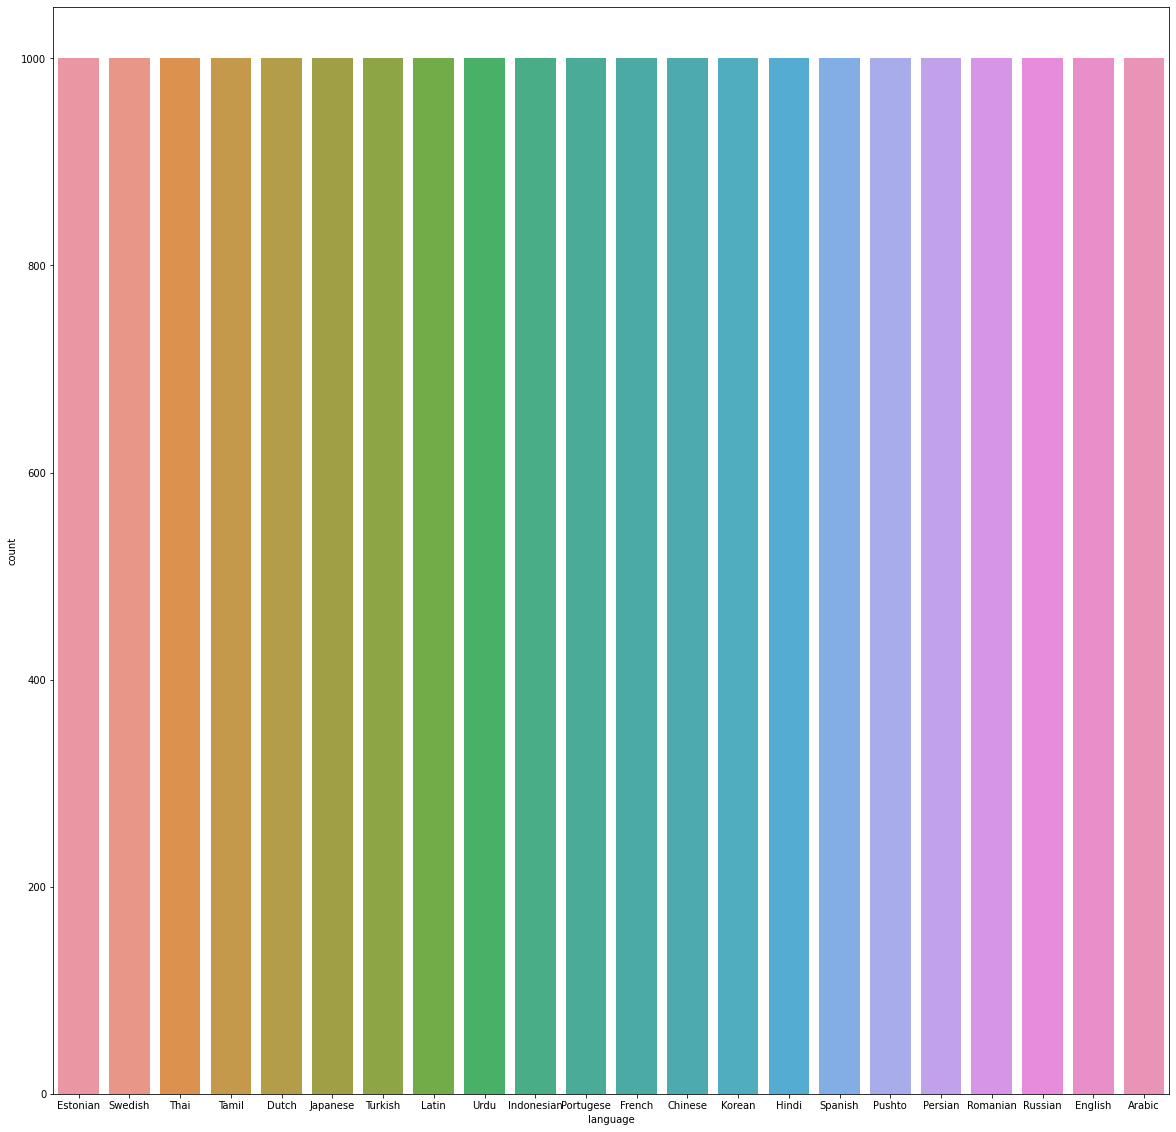

In [7]:
plt.figure(figsize=(20,20))
sns.countplot(data['language'])

In [8]:
data['Text'][3]

'விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார்  ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார்  கோவை செம்மொழி மாநாட்டில் "தமிழ்ச்சங்கங்களும் தமிழும்" எனும் தலைப்பில் பிற மாநிலங்களில் தமிழ்வளர்ச்சி பற்றி கட்டுரை வாசித்தார்'

## Remove stopwards from sentences

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [ ]:
ps = PorterStemmer()
corpus=[]

for i in range(len(data['Text'])):
    
    rev = re.sub("^[a-zA-Z]",' ', data['Text'][i]) 
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if set(stopwords.words())]
    rev = ' '.join(rev)
    print(i)
    corpus.append(rev)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [ ]:
corpus

## Convert sentences into vector

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000)
X = cv.fit_transform(corpus).toarray()

In [12]:
X.shape

(22000, 10000)

## LabelEncoding (Convert language name into 1,2,3....etc)

In [13]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(data['language'])

In [14]:
y

array([ 4, 17, 19, ..., 16,  1, 14])

In [15]:
len(y)

22000

In [16]:
label.classes_

array(['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French',
       'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian',
       'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
       'Tamil', 'Thai', 'Turkish', 'Urdu'], dtype=object)

## Final data Looks like

In [17]:
data1 = pd.DataFrame(np.c_[corpus,y],columns=['Sentence','Language'])

In [18]:
data1

,Sentence,Language
0,lement gottwaldi surnukeha palsameer ning paig...,4
1,ebe joseph pereira thoma på eng the jesuit and...,17
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,19
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,18
4,e spon behoort tot het geslacht haliclona en b...,2
...,...,...
21995,or du terrain le anné et sont de anné de crise...,5
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเด...,19
21997,on motivo de la celebración del septuagésimoqu...,16
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《babi i like》，由...,1


## split data into training and testing

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17600, 10000), (4400, 10000), (17600,), (4400,))

## Define model

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
classifier = MultinomialNB().fit(X_train,y_train)

## Test model on test data

In [23]:
pred = classifier.predict(X_test)

In [24]:
pred

array([10, 14, 20, ..., 19, 21, 17])

In [25]:
y_test

array([10, 14, 20, ..., 19, 21, 17])

## Evaluate

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.923409090909091
[[193   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  62   0  17 112   3   0   0   0   0   0   0   0   0   0   0   2   0
    0   0   1   0]
 [  0   0 202   3   0   2   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   1   0 199   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   2 171   1   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   1   0]
 [  0   0   0   1   0 195   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   4   0   0 188   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   1   0   0   0 191   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  12   0   8  88   3   0   0  65   0   0   0   0   0   1   1   3   1
    0   0   0   0]
 [  0   0   0   0   4   0   0   0   0 200   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0  11   0   1   0   0   0   0 186   0   

## Confusion matrix

<AxesSubplot:>

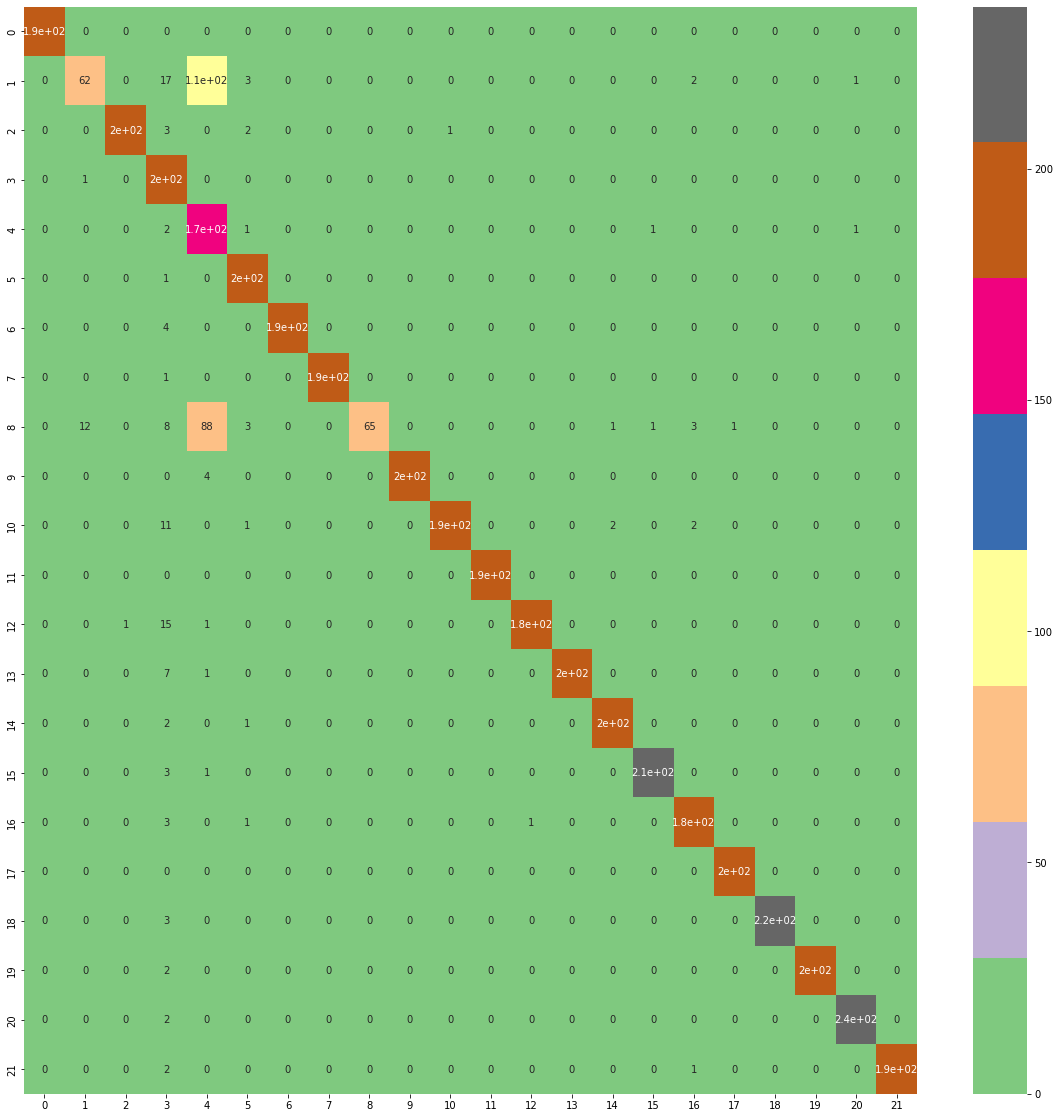

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap=plt.cm.Accent)

## Actual Language and Predicted Language

In [28]:
fnl = pd.DataFrame(np.c_[y_test,pred],columns=['Actual','Predicted'])
fnl

,Actual,Predicted
0,10,10
1,14,14
2,20,20
3,16,16
4,12,12
...,...,...
4395,20,20
4396,1,4
4397,19,19
4398,21,21


## Save model

In [29]:
import joblib

joblib.dump(classifier , 'language_identification.sav')

['language_identification.sav']

## Load model

In [30]:
model = joblib.load('language_identification.sav')

## Test model

In [31]:
def test_model(test_sentence):
    languages = {
    'Arabic' : 0,
    'Chinese' : 1,
    'Dutch' : 2,
    'English' : 3,
    'Estonian' : 4,
    'French' : 5,
    'Hindi' : 6,
    'Indonesian' : 7,
    'Japanese' : 8,
    'Korean' : 9,
    'Latin' : 10,
    'Persian' : 11,
    'Portugese' : 12,
    'Pushto' : 13,
    'Romanian' : 14,
    'Russian' : 15,
    'Spanish' : 16,
    'Swedish' : 17,
    'Tamil' : 18,
    'Thai' : 19,
    'Turkish' : 20,
    'Urdu' : 21
    }
    
    
    
    
    rev = re.sub('^[a-zA-Z]',' ',test_sentence)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words())]
    rev = ' '.join(rev)
    
    rev = cv.transform([rev]).toarray()
    
    output = model.predict(rev)[0]
    
    keys = list(languages)
    values = list(languages.values())
    position = values.index(output)
    
    output = keys[position]
    
    print(output)

In [32]:
test_model('நாங்கள் நல்ல சிறுவர்கள்')

Tamil


In [33]:
test_model('พวกเราเป็นเด็กดี')

Thai


In [34]:
test_model('İyi ki doğdun Raman')

Turkish


In [35]:
test_model('in quo habitas')

Latin


In [36]:
pd.DataFrame(np.c_[data['Text'],data['language'],y],columns=['Sentence','Language','Encoded'])

,Sentence,Language,Encoded
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,4
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,17
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,19
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,18
4,de spons behoort tot het geslacht haliclona en...,Dutch,2
...,...,...,...
21995,hors du terrain les années et sont des année...,French,5
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai,19
21997,con motivo de la celebración del septuagésimoq...,Spanish,16
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese,1


In [37]:
# languages = {
#     'Arabic' : 0,
#     'Chinese' : 1,
#     'Dutch' : 2,
#     'English' : 3,
#     'Estonian' : 4,
#     'French' : 5,
#     'Hindi' : 6,
#     'Indonesian' : 7,
#     'Japanese' : 8,
#     'Korean' : 9,
#     'Latin' : 10,
#     'Persian' : 11,
#     'Portugese' : 12,
#     'Pushto' : 13,
#     'Romanian' : 14,
#     'Russian' : 15,
#     'Spanish' : 16,
#     'Swedish' : 17,
#     'Tamil' : 18,
#     'Thai' : 19,
#     'Turkish' : 20,
#     'Urdu' : 21
# }

In [38]:
# creating a pickle file
import pickle
pickle.dump(classifier, open('language_detector.pkl','wb'))